In [2]:
# Import standard libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read csv File to import data
car_data=pd.read_csv(r'C:\Users\Priyanka\Downloads\Anil\Machine Learning and NLP Python documents\Statistics and Machine Learning\Module8_LinearRegression_assignment\CarPrice_Assignment.csv',
           encoding='ISO-8859-1')

In [4]:
# Getting to know the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
print(car_data.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [6]:
print(car_data.describe()) 

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [7]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


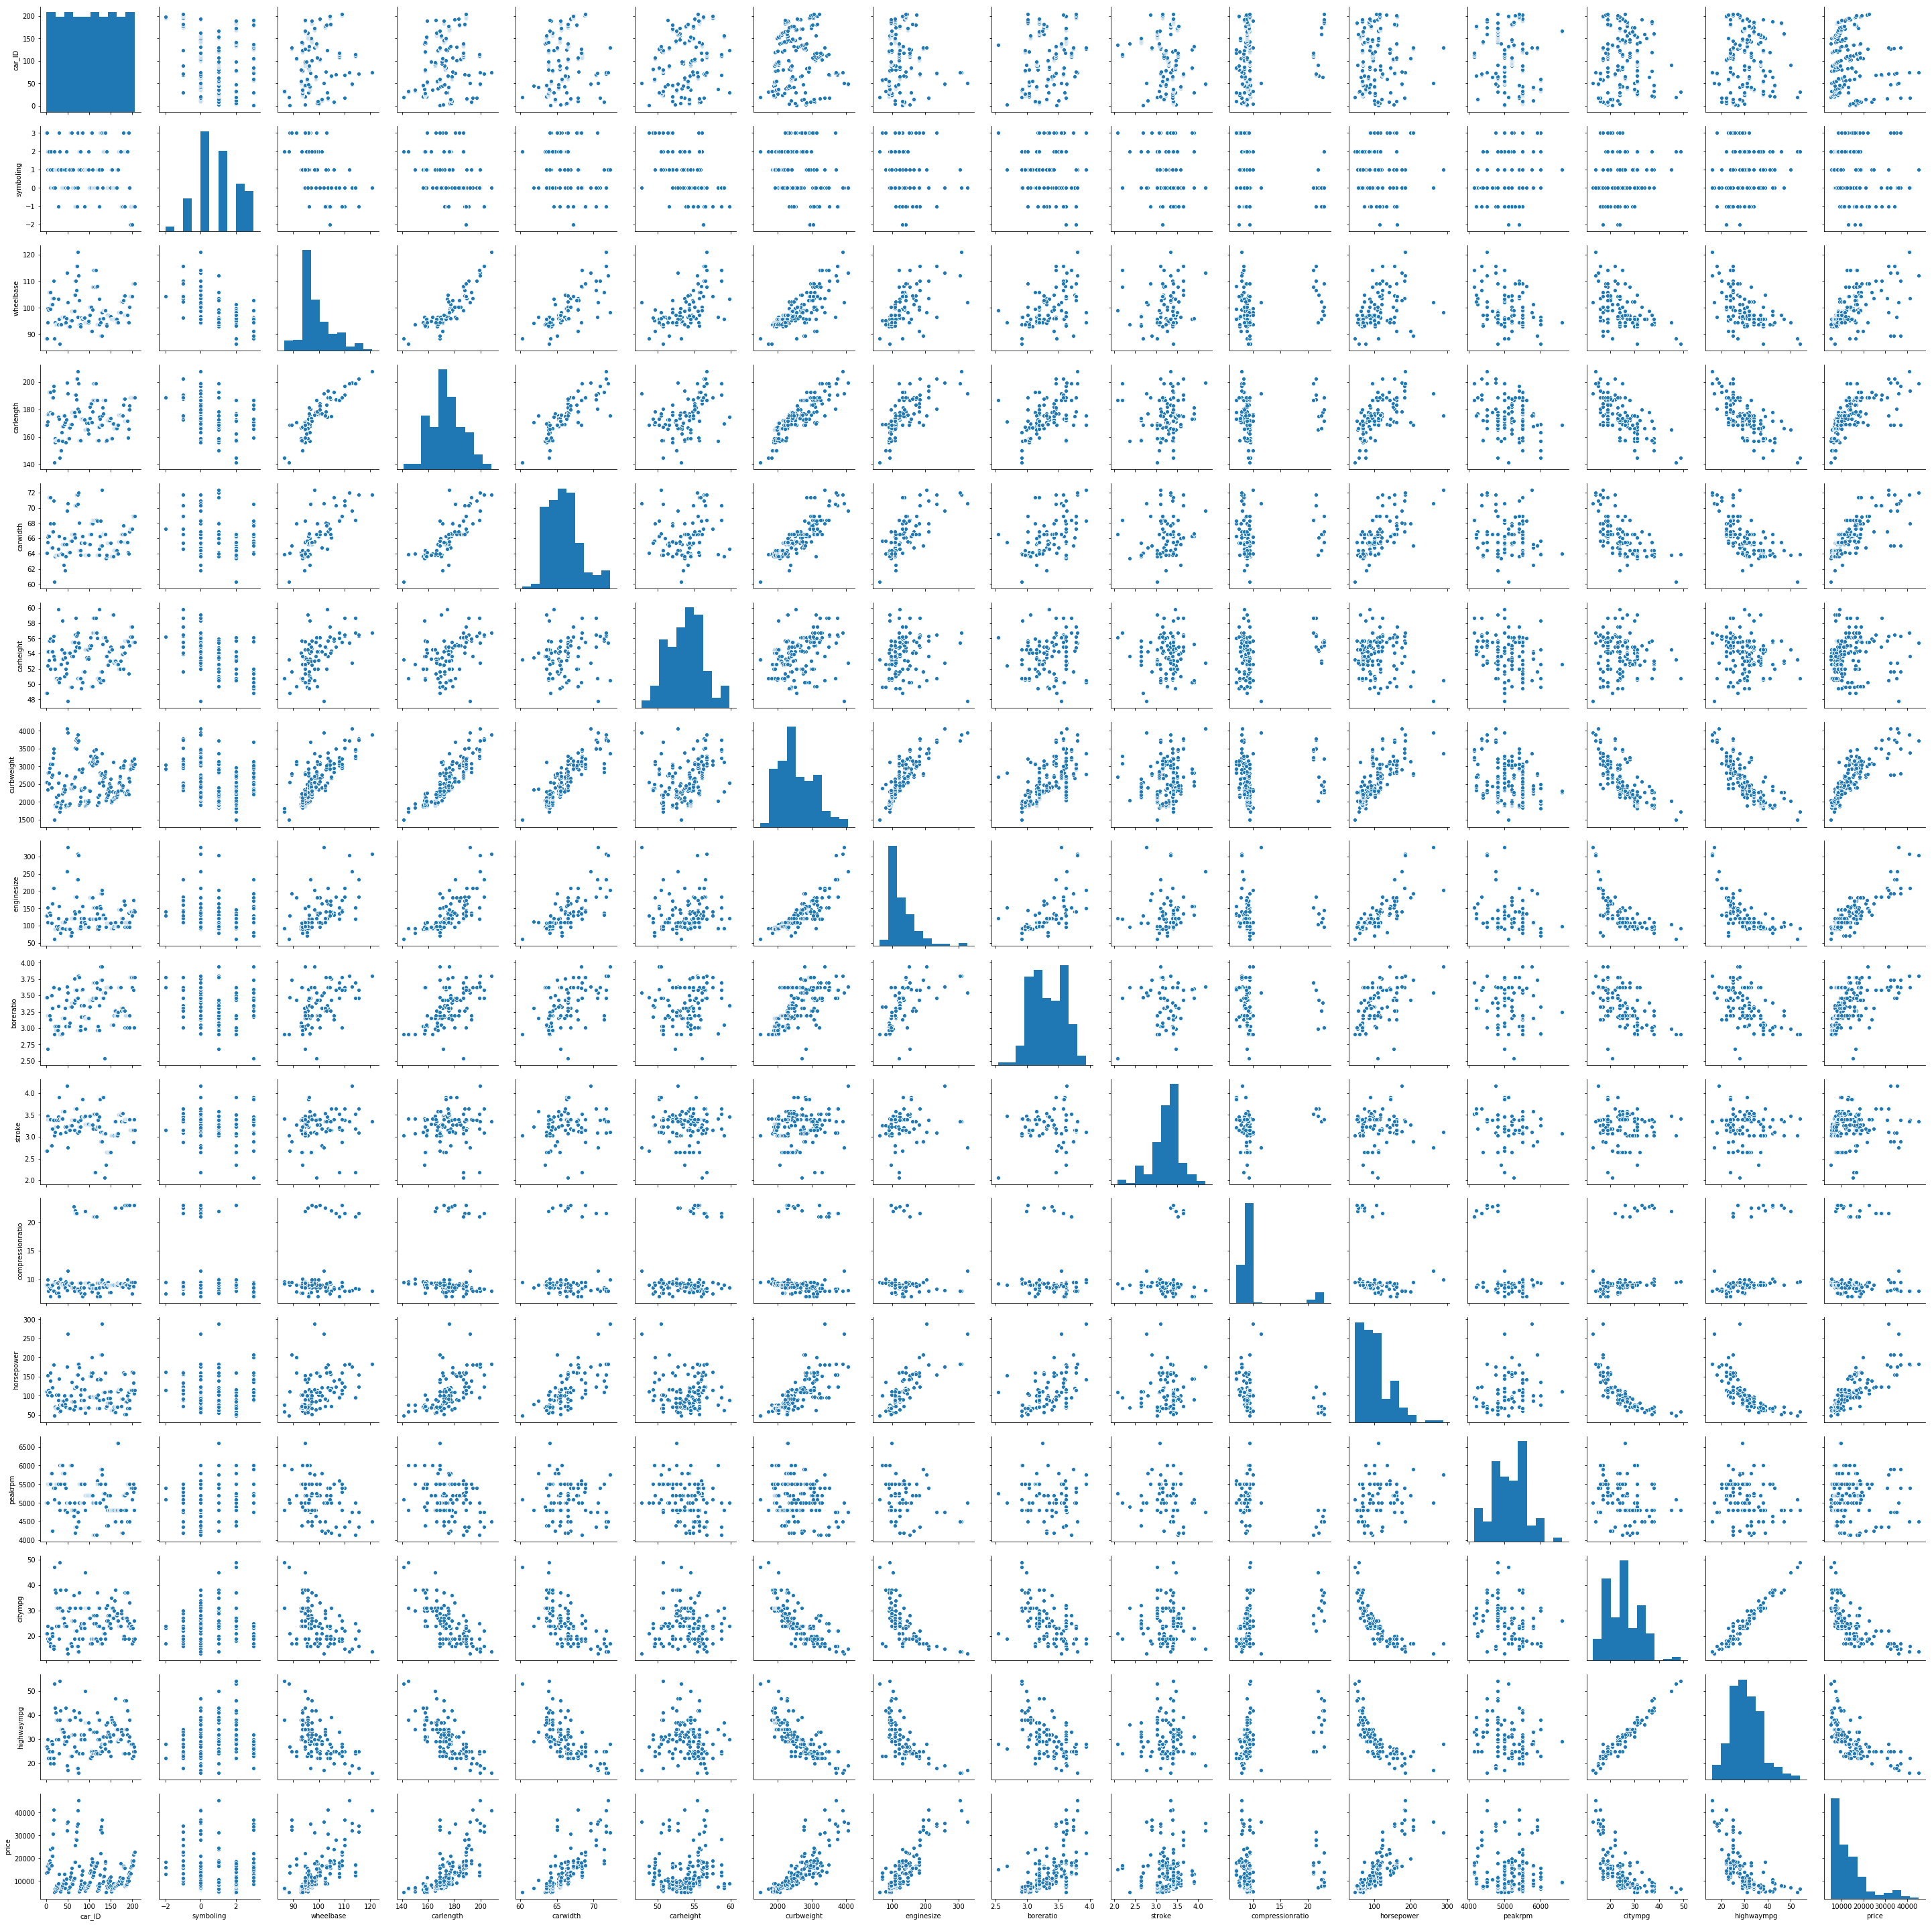

In [8]:
#Visualising the data
sns.pairplot(car_data)
plt.show()

In [9]:
## Data Preparation

In [10]:
#Since we need to consider only company name as the independent, discarding the rest of the string in column CarName
car_data.CarName=car_data.CarName.str.split().str[0]

In [11]:
#Inspecting values in CarName column
car_data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
#Replacing few string values with correct spellings
car_data.CarName=car_data.CarName.replace('maxda','mazda')
car_data.CarName=car_data.CarName.replace('Nissan','nissan')
car_data.CarName=car_data.CarName.replace('porcshce','porsche')
car_data.CarName=car_data.CarName.replace('toyouta','toyota')
car_data.CarName=car_data.CarName.replace('vokswagen','volkswagen')
car_data.CarName=car_data.CarName.replace('vw','volkswagen')

In [13]:
print(car_data.CarName.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [14]:
#Inspecting values in rest of the categorical column
print(car_data.fueltype.unique())
print(car_data.aspiration.unique())
print(car_data.doornumber.unique())
print(car_data.carbody.unique())
print(car_data.drivewheel.unique())
print(car_data.enginelocation.unique())
print(car_data.fuelsystem.unique())
print(car_data.enginetype.unique())
print(car_data.cylindernumber.unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [15]:
# Fixing duplicate name in drivewheel column
car_data.drivewheel=car_data.drivewheel.replace('fwd','4wd')

In [16]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,4wd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
# Converting the categorical columns with numeric description 
car_data.doornumber=car_data.doornumber.replace('two','2')
car_data.doornumber=car_data.doornumber.replace('four','4')
car_data['doornumber']=pd.to_numeric(car_data['doornumber'], errors='ignore')
car_data.head()
# https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

#categorical_cols

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,4wd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
# import labelencoder
#from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
#le = LabelEncoder()
# apply le on categorical feature columns
# filter categorical columns using mask and turn it into a list
# Categorical boolean mask
categorical_feature_mask = car_data.dtypes==object
categorical_cols = car_data.columns[categorical_feature_mask].tolist()
categorical_cols
#car_data[categorical_cols] = car_data[categorical_cols].apply(lambda col: le.fit_transform(col))
#car_data[categorical_cols].head(10)

['CarName',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [19]:
#convert categorical values using get dummies
X= car_data[['CarName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']]
X = pd.get_dummies(data=X, drop_first=True)

In [20]:
X.head()

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#Append the dummies values into the original 
car_data=pd.concat([car_data,X],axis=1)

In [22]:
#Drop the categorical columns
car_data.drop(['CarName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'], axis = 1, inplace = True)

In [23]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
car_ID                   205 non-null int64
symboling                205 non-null int64
doornumber               205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
CarName_audi             205 non-null uint8
CarName_bmw              205 non-null uint8
CarName_buick            205 non-null uint8

In [24]:
print(car_data.head())
print(car_data.columns)

   car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0       1          3           2       88.6      168.8      64.1       48.8   
1       2          3           2       88.6      168.8      64.1       48.8   
2       3          1           2       94.5      171.2      65.5       52.4   
3       4          2           4       99.8      176.6      66.2       54.3   
4       5          2           4       99.4      176.6      66.4       54.3   

   curbweight  enginesize  boreratio  ...  cylindernumber_three  \
0        2548         130       3.47  ...                     0   
1        2548         130       3.47  ...                     0   
2        2823         152       2.68  ...                     0   
3        2337         109       3.19  ...                     0   
4        2824         136       3.19  ...                     0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                      0                   0             

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
#Scaling the required columns
num_vars=['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Priyanka\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
df_train.price.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [29]:
df_train.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.478061,0.559441,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.289106,0.239200,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.232843,0.400000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.470588,0.600000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.718137,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


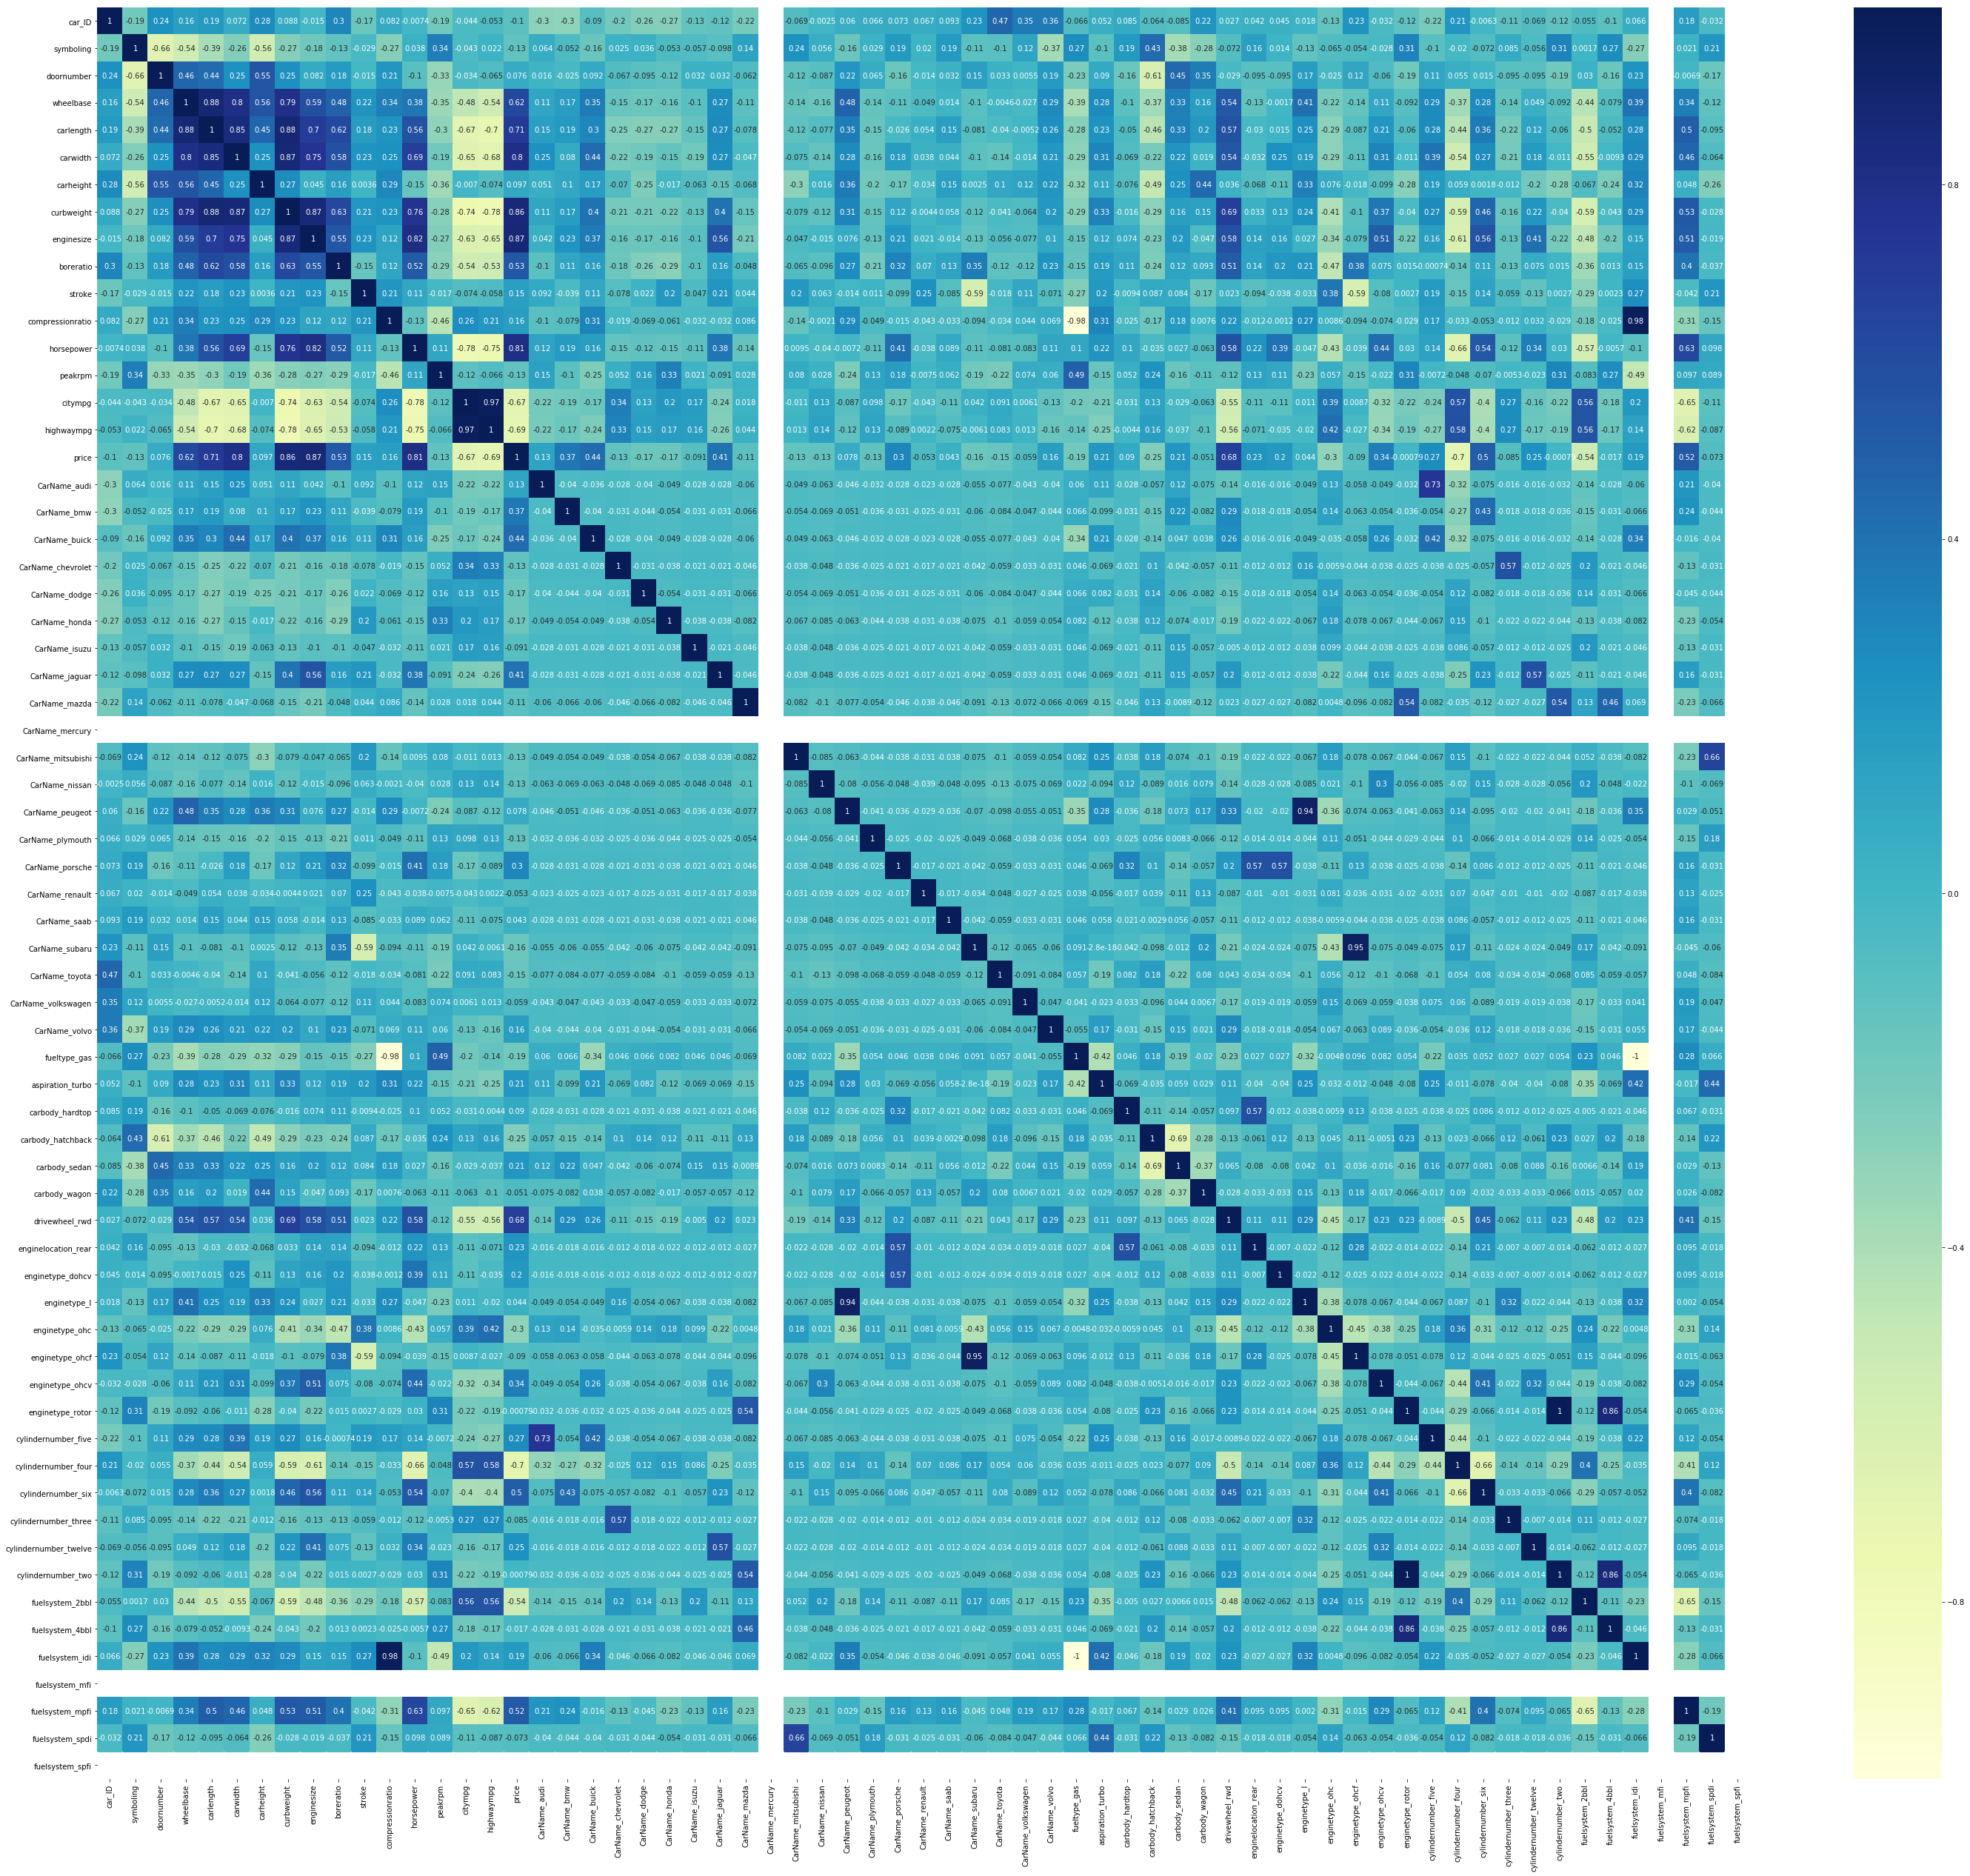

In [30]:
#check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50,44))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [31]:
y_train = df_train.pop('price')
x_train = df_train

In [32]:
#Build a linear model with all the variables

import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr_1 = sm.OLS(y_train, x_train_lm).fit()

lr_1.params

C:\Users\Priyanka\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                   -1.920069e-01
car_ID                   5.582037e-01
symboling               -2.530781e-03
doornumber               9.905191e-03
wheelbase                1.803281e-01
carlength               -1.610142e-01
carwidth                 2.354388e-01
carheight               -1.312710e-01
curbweight               3.341699e-01
enginesize               2.117431e+00
boreratio               -6.577542e-01
stroke                  -2.258114e-01
compressionratio        -3.862982e-01
horsepower              -2.386106e-01
peakrpm                  1.982681e-01
citympg                 -4.623522e-02
highwaympg               1.430411e-01
CarName_audi             6.499882e-02
CarName_bmw              3.194505e-01
CarName_buick           -1.092050e-01
CarName_chevrolet       -1.230301e-01
CarName_dodge           -1.816509e-01
CarName_honda           -1.753411e-01
CarName_isuzu           -1.324295e-01
CarName_jaguar          -2.070066e-01
CarName_mazda           -1.449199e-01
CarName_merc

In [33]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     59.28
Date:                Sun, 12 May 2019   Prob (F-statistic):           4.32e-50
Time:                        23:00:23   Log-Likelihood:                 282.04
No. Observations:                 143   AIC:                            -448.1
Df Residuals:                      85   BIC:                            -276.2
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.19

C:\Users\Priyanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Priyanka\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Priyanka\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Priyanka\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [34]:
#Since the variables are too many for manual elimiation, using automated feature elimination RFE
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [36]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 13),
 ('symboling', False, 50),
 ('doornumber', False, 48),
 ('wheelbase', False, 34),
 ('carlength', False, 33),
 ('carwidth', True, 1),
 ('carheight', False, 9),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 7),
 ('horsepower', False, 25),
 ('peakrpm', False, 15),
 ('citympg', False, 24),
 ('highwaympg', False, 23),
 ('CarName_audi', False, 17),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 39),
 ('CarName_chevrolet', False, 31),
 ('CarName_dodge', False, 26),
 ('CarName_honda', False, 27),
 ('CarName_isuzu', False, 32),
 ('CarName_jaguar', False, 28),
 ('CarName_mazda', False, 29),
 ('CarName_mercury', False, 51),
 ('CarName_mitsubishi', False, 8),
 ('CarName_nissan', False, 20),
 ('CarName_peugeot', False, 4),
 ('CarName_plymouth', False, 11),
 ('CarName_porsche', False, 41),
 ('CarName_renault', False, 10),
 ('CarName_saab', False, 21),
 ('CarName_subaru', False, 18),
 ('Car

In [37]:
col = x_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

In [38]:
x_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'CarName_audi', 'CarName_buick', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarName_jaguar',
       'CarName_mazda', 'CarName_mercury', 'CarName_mitsubishi',
       'CarName_nissan', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_porsche', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'f

In [39]:
# Creating x_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [40]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\Priyanka\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [42]:
#Let's see the summary of our RFE linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     123.9
Date:                Sun, 12 May 2019   Prob (F-statistic):           1.32e-63
Time:                        23:00:26   Log-Likelihood:                 190.98
No. Observations:                 143   AIC:                            -358.0
Df Residuals:                     131   BIC:                            -322.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

In [43]:
#Drop enginetype_dohcv columnas it has high p value
x_train_new = x_train_rfe.drop(["enginetype_dohcv"], axis = 1)

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_2 = sm.add_constant(x_train_new)

In [45]:
lm = sm.OLS(y_train,X_train_lm_2).fit()   # Running the linear model

In [46]:
#Let's see the summary of our 2nd linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sun, 12 May 2019   Prob (F-statistic):           3.04e-64
Time:                        23:00:26   Log-Likelihood:                 189.87
No. Observations:                 143   AIC:                            -357.7
Df Residuals:                     132   BIC:                            -325.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

In [47]:
x_train_new.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'enginelocation_rear', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [48]:
#Dropping the next variable with high p-value
x_train_new = x_train_new.drop(['cylindernumber_twelve'], axis=1)

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_3 = sm.add_constant(x_train_new)

In [50]:
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()   # Running the linear model

In [51]:
#Let's see the summary of our 3rd linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 12 May 2019   Prob (F-statistic):           1.35e-64
Time:                        23:00:27   Log-Likelihood:                 187.99
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     133   BIC:                            -326.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1315 

In [52]:
#Dropping the next variable with high p-value
x_train_new = x_train_new.drop(['stroke'], axis=1)

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_4 = sm.add_constant(x_train_new)

In [54]:
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()   # Running the 4th linear model

In [55]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.7
Date:                Sun, 12 May 2019   Prob (F-statistic):           8.50e-65
Time:                        23:00:27   Log-Likelihood:                 185.72
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     134   BIC:                            -326.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1765 

In [56]:
#Dropping the next variable with high p-value
x_train_new = x_train_new.drop(['boreratio'], axis=1)

In [57]:
import statsmodels.api as sm  
X_train_lm_5 = sm.add_constant(x_train_new)

In [58]:
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()   # Running the 5th linear model

In [59]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     178.4
Date:                Sun, 12 May 2019   Prob (F-statistic):           5.64e-65
Time:                        23:00:28   Log-Likelihood:                 183.34
No. Observations:                 143   AIC:                            -350.7
Df Residuals:                     135   BIC:                            -327.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1931 

In [60]:
#Dropping the const variable
x_train_new = x_train_new.drop(['const'], axis=1)

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_new = x_train_new
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Priyanka\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
5,enginetype_rotor,inf
7,cylindernumber_two,inf
1,curbweight,35.63
0,carwidth,20.17
2,enginesize,17.34
3,CarName_bmw,1.13
4,enginelocation_rear,1.08
6,cylindernumber_three,1.00


In [62]:
# Dropping highly correlated variables and insignificant variables
X_new = X_new.drop('enginetype_rotor', 1)

In [63]:
# Dropping highly correlated variables and insignificant variables
X_new = X_new.drop('cylindernumber_two', 1)

In [64]:
import statsmodels.api as sm  
X_train_lm_6 = sm.add_constant(X_new)

C:\Users\Priyanka\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()   # Running the 6th linear model

In [66]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     186.8
Date:                Sun, 12 May 2019   Prob (F-statistic):           4.11e-63
Time:                        23:00:29   Log-Likelihood:                 175.94
No. Observations:                 143   AIC:                            -337.9
Df Residuals:                     136   BIC:                            -317.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1917 

In [67]:
X_train_lm_6 = X_train_lm_6.drop(['const'], axis=1)

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_new_2 = X_train_lm_6
vif['Features'] = X_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_new_2.values, i) for i in range(X_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,34.22
0,carwidth,19.95
2,enginesize,14.83
3,CarName_bmw,1.13
4,enginelocation_rear,1.07
5,cylindernumber_three,1.00


In [69]:
# Dropping highly correlated variables and insignificant variables
X_new_2 = X_new_2.drop('curbweight', 1)

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_new_2.values, i) for i in range(X_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,8.84
0,carwidth,8.33
2,CarName_bmw,1.13
3,enginelocation_rear,1.07
4,cylindernumber_three,1.00


In [71]:
# Dropping highly correlated variables and insignificant variables
X_new_2 = X_new_2.drop('enginesize', 1)

In [72]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_new_2.values, i) for i in range(X_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,1.06
1,CarName_bmw,1.05
2,enginelocation_rear,1.00
3,cylindernumber_three,1.00


In [73]:
import statsmodels.api as sm  
X_train_lm_7 = sm.add_constant(X_new_2)

C:\Users\Priyanka\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [74]:
lm_7 = sm.OLS(y_train,X_train_lm_7).fit()   # Running the 7th linear model

In [75]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 12 May 2019   Prob (F-statistic):           1.92e-48
Time:                        23:00:30   Log-Likelihood:                 134.98
No. Observations:                 143   AIC:                            -260.0
Df Residuals:                     138   BIC:                            -245.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2337 

In [76]:
#Residual analysis
y_train_price = lm_7.predict(X_train_lm_7)

In [77]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

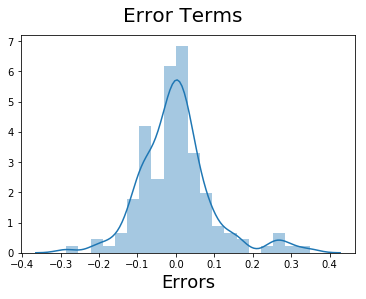

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [79]:
#Making predictions using the final model
num_vars=['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg', 'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Priyanka\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj

In [80]:
y_test = df_test.pop('price')
X_test = df_test

In [81]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_new_2.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\Users\Priyanka\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [90]:
# Making predictions
y_pred = lm_7.predict(X_test_new)

Text(0, 0.5, 'y_pred')

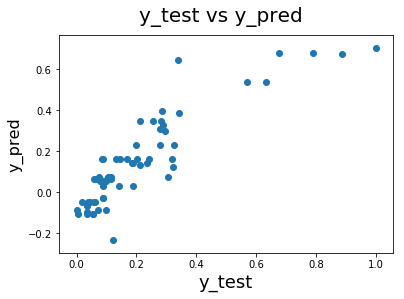

In [91]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.12018185575707692

In [93]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.669979448468597

In [ ]:
#Test model is similar to the residual analysis with outliers so we 

In [ ]:
#So we infer the model 7 as the appropriate model where we have 4 parameters which influence the price of cars
#carwidth   --> car width
#CarName_bmw  --> Brand name
#enginelocation_rear --> Engine location
#cylindernumber_three  --> Cylinder number